In [1]:
%pip install scikit-learn
%pip install sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd

In [3]:
wine = datasets.load_wine()
wine['data']

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
df = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
df['target'] = wine['target']
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [7]:
from sklearn.cluster import KMeans
km1 = KMeans(n_clusters=3, random_state=42).fit(df[['alcohol','malic_acid']])

In [8]:
km1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0,
       2, 0])

In [9]:
clusters1 = pd.DataFrame(km1.labels_, columns=['cluster'])
df1 = pd.concat([df[['alcohol','malic_acid']], clusters1], axis=1)
df1

,alcohol,malic_acid,cluster
0,14.23,1.71,2
1,13.20,1.78,2
2,13.16,2.36,2
3,14.37,1.95,2
4,13.24,2.59,2
...,...,...,...
173,13.71,5.65,0
174,13.40,3.91,0
175,13.27,4.28,0
176,13.17,2.59,2


In [10]:
fig1 = px.scatter(df1, 'alcohol', 'malic_acid', color='cluster')
fig1.show()

In [11]:
km1 = KMeans(n_clusters=5, random_state=42).fit(df[['alcohol','malic_acid']])

clusters1 = pd.DataFrame(km1.labels_, columns=['cluster'])
df1 = pd.concat([df[['alcohol','malic_acid']], clusters1], axis=1)

fig1 = px.scatter(df1, 'alcohol', 'malic_acid', color='cluster')
fig1.show()

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(df)

clusters = pd.DataFrame(kmeans.labels_, columns=['cluster'])
df2 = pd.concat([df, clusters], axis=1)
df2

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,0


In [13]:
fig1 = px.scatter(df2, 'alcohol', 'malic_acid', color='cluster')
fig1.show()

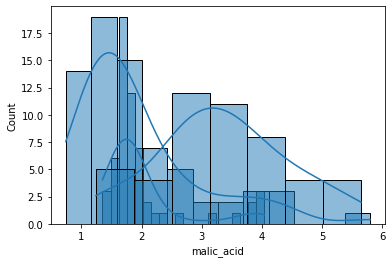

In [6]:
for i in range(0,3):
    sns.histplot(df['malic_acid'][df.target==i], kde=1)
plt.show()

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(df)
pca_trans = pca.transform(df)
pca_trans


array([[ 3.18564055e+02,  2.14907729e+01],
       [ 3.03098514e+02, -5.36608268e+00],
       [ 4.38062063e+02, -6.53798613e+00],
       [ 7.33240711e+02,  1.93319951e-01],
       [-1.15699516e+01,  1.84872549e+01],
       [ 7.03231800e+02, -3.31723191e-01],
       [ 5.42972384e+02, -1.35191971e+01],
       [ 5.48402656e+02,  1.14491475e+01],
       [ 2.98037964e+02, -8.18149185e+00],
       [ 2.98050654e+02, -7.10283985e+00],
       [ 7.63080247e+02, -8.33356923e+00],
       [ 5.32944043e+02, -1.42878810e+01],
       [ 5.72835177e+02, -2.10050612e+01],
       [ 4.02926332e+02, -1.61035066e+01],
       [ 8.00053884e+02, -1.21175637e+01],
       [ 5.63246356e+02,  2.21467383e+00],
       [ 5.33380465e+02,  1.08044932e+01],
       [ 3.83318588e+02,  8.47646622e+00],
       [ 9.33118716e+02, -8.35296527e+00],
       [ 9.84045208e+01,  1.43903679e+01],
       [ 3.35950160e+01,  2.55653372e+01],
       [ 2.31478724e+01,  1.81494036e+00],
       [ 2.88094143e+02, -3.96443421e+00],
       [ 2.

In [15]:
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
df3 = pd.concat([df2['cluster'], pca_trans_df], axis=1)
df3


,cluster,pca1,pca2
0,1,318.564055,21.490773
1,1,303.098514,-5.366083
2,1,438.062063,-6.537986
3,1,733.240711,0.193320
4,0,-11.569952,18.487255
...,...,...,...
173,0,-6.981858,-4.538116
174,0,3.129945,2.338236
175,0,88.456310,18.779644
176,0,93.454472,18.674180


In [16]:
fig = px.scatter(df3, 'pca1', 'pca2', color='cluster')
fig.show()

In [17]:
dfflu = pd.read_csv('datasets/NCHSData44.csv')
dfflu

,Year,Week,Percent of Deaths Due to Pneumonia and Influenza (P&I),"Percent of Deaths Due to Pneumonia, Influenza or COVID-19 (PIC)",Expected,Threshold,All Deaths,Pneumonia Deaths,Influenza Deaths,COVID-19 Deaths,"Pneumonia, Influenza or COVID-19 Deaths (PIC)"
0,2014,53,10.469464,10.469464,7.81631,8.22978,26477,2290,482,0,2772
1,2015,1,10.807616,10.807616,7.90836,8.32144,61762,5575,1100,0,6675
2,2015,2,10.745058,10.745058,7.98757,8.40028,61163,5589,983,0,6572
3,2015,3,10.051836,10.051836,8.05277,8.46510,58646,5184,711,0,5895
4,2015,4,9.499956,9.499956,8.10296,8.51490,57295,4857,586,0,5443
...,...,...,...,...,...,...,...,...,...,...,...
405,2022,40,5.949473,8.383105,5.44919,5.75240,56089,3314,23,2051,4702
406,2022,41,6.041126,8.440163,5.53067,5.83388,53980,3211,50,1918,4556
407,2022,42,6.407659,8.884708,5.61991,5.92312,48364,3066,33,1803,4297
408,2022,43,6.204711,8.661050,5.71563,6.01884,40711,2466,60,1554,3526


In [18]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(random_state=42, contamination=0.04).fit(dfflu[['Influenza Deaths']])
model

IsolationForest(contamination=0.04, random_state=42)

In [19]:
dfflu['date']=pd.to_datetime(dfflu['Year'].astype(str) + dfflu['Week'].astype(str) + '0', format='%Y%W%w')
dfflu.head()

,Year,Week,Percent of Deaths Due to Pneumonia and Influenza (P&I),"Percent of Deaths Due to Pneumonia, Influenza or COVID-19 (PIC)",Expected,Threshold,All Deaths,Pneumonia Deaths,Influenza Deaths,COVID-19 Deaths,"Pneumonia, Influenza or COVID-19 Deaths (PIC)",date
0,2014,53,10.469464,10.469464,7.81631,8.22978,26477,2290,482,0,2772,2015-01-11
1,2015,1,10.807616,10.807616,7.90836,8.32144,61762,5575,1100,0,6675,2015-01-11
2,2015,2,10.745058,10.745058,7.98757,8.40028,61163,5589,983,0,6572,2015-01-18
3,2015,3,10.051836,10.051836,8.05277,8.46510,58646,5184,711,0,5895,2015-01-25
4,2015,4,9.499956,9.499956,8.10296,8.51490,57295,4857,586,0,5443,2015-02-01


In [20]:
dfflu['scores']=model.decision_function(dfflu[['Influenza Deaths']])
dfflu['anomaly']=model.predict(dfflu[['Influenza Deaths']])
dfflu[['Year','Week','Influenza Deaths', 'scores', 'anomaly']].head(20)


,Year,Week,Influenza Deaths,scores,anomaly
0,2014,53,482,0.101181,1
1,2015,1,1100,-0.116465,-1
2,2015,2,983,-0.119912,-1
3,2015,3,711,-0.070000,-1
4,2015,4,586,0.009070,1
5,2015,5,484,0.094043,1
6,2015,6,405,0.031407,1
7,2015,7,285,0.082969,1
8,2015,8,221,0.053934,1
9,2015,9,191,0.073056,1


In [21]:
dfflu[['Year','Week','Influenza Deaths', 'scores', 'anomaly']].loc[dfflu['anomaly']==-1]

,Year,Week,Influenza Deaths,scores,anomaly
1,2015,1,1100,-0.116465,-1
2,2015,2,983,-0.119912,-1
3,2015,3,711,-0.070000,-1
112,2017,8,605,-0.005102,-1
156,2017,52,671,-0.037450,-1
157,2018,1,1165,-0.104286,-1
158,2018,2,1536,-0.172039,-1
159,2018,3,1626,-0.194572,-1
160,2018,4,1448,-0.156333,-1
161,2018,5,1360,-0.141450,-1


In [22]:
fig = px.scatter(x=dfflu.date, y=dfflu['Influenza Deaths'], color=dfflu['anomaly'])
fig.show()

In [23]:
model = IsolationForest(random_state=42, contamination=0.1).fit(dfflu[['COVID-19 Deaths']])

dfflu['scoresC']=model.decision_function(dfflu[['COVID-19 Deaths']])
dfflu['anomalyC']=model.predict(dfflu[['COVID-19 Deaths']])

fig = px.scatter(x=dfflu.date, y=dfflu['COVID-19 Deaths'], color=dfflu['anomalyC'])
fig.show()